
### Dimensionality Reduction and Clustering

-----------

Emir Arda Eker

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Do not import any other libraries. You can add libraries only for visualizations.

from kmeans import KMeans

### K-Means Clustering
* Fill the functions from kmeans.py
* Use the below cells to validate your implementations for each function using simple inputs. **Do not change the cells.** These cells are given to make sure you wrote all the functions correctly before creating the K-Means model.

In [2]:
n_clusters = 3

In [3]:
# Validate the function "mean"
data = np.array([[1.1, 1, 1, 0.5], [4, 3.14, 2, 1], [0, 0, 0, 0]])
km = KMeans(data, n_clusters)
print(km.mean(data))

[1.7, 1.3800000000000001, 1.0, 0.5]


In [4]:
# Validate the function "std"
print(km.std())

[1.687206764645835, 1.309758247413112, 0.816496580927726, 0.408248290463863]


In [5]:
# Validate the function "standard_scaler"
print(km.standard_scaler())

[[-0.35561735086211976, -0.29012987759423053, 0.0, 0.0], [1.3631998449714593, 1.3437594330680147, 1.224744871391589, 1.224744871391589], [-1.0075824941093396, -1.0536295554737845, -1.224744871391589, -1.224744871391589]]


In [6]:
# Validate the function "euclidean_distance"
print(km.euclidean_distance(data[0], data[1]))

3.7735394525564456


In [7]:
# Validate the function "get_closest_centroid"
km.centroids = [[1, 1, 1, 1],[2, 2, 2, 2]]
print(km.get_closest_centroid(data[0]))

0


In [8]:
# Validate the function "update_clusters"
km.X = [[1.1, 1, 1, 1.2], [4, 2, 2, 1.5], [0, 0, 0, 0]]
km.centroids = [[1, 1, 1, 1], [2, 2, 2, 2], [6, 6, 6, 6]]
print(km.update_clusters())

{'0': [[1.1, 1, 1, 1.2], [0, 0, 0, 0]], '1': [[4, 2, 2, 1.5]], '2': []}


In [9]:
km.update_centroids(km.update_clusters())
print(km.centroids)

[[0.55, 0.5, 0.5, 0.6], [4.0, 2.0, 2.0, 1.5], [6, 6, 6, 6]]


In [10]:
c1 = {0: [[1.1, 1], [0, 0]],
                    1: [[4, 2]]}
c2 = {0: [[1.1, 1], [0, 0]],
                        1: [[4, 2]]}
print(km.converged(c1, c2))

c1 = {0: [[1.1, 1], [0, 2]],
                    1: [[6, 7]]}
c2 = {0: [[1.1, 1], [0, 0]],
                        1: [[4, 2]]}
print(km.converged(c1, c2))

True
False


### Dimensionality Reduction using PCA
* **TODO**: Fill the below function called pca.
* Do not use libraries other than numpy.

In [11]:
def pca(X, n_components):
    """
    Perform Principal Component Analysis (PCA) on the given data.

    :param X: Input data matrix of shape (n_samples, n_features)
    :param n_components: Number of principal components to keep
    :return: Transformed data matrix of shape (n_samples, n_components)
    """
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    X_standardized = (X - X_mean) / X_std

    # Computinging the cvrnc. matrix
    covariance_matrix = np.cov(X_standardized, rowvar=False)

    # Computing the eig's 
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sorting the eigval and vecs. in descending order
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    # Selecting the top vectors and stuff
    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    # Transforming the DATA
    X_pca = np.dot(X_standardized, selected_eigenvectors)
    
    return X_pca


### Fit K-Means Clustering
* Fill the "fit" function in kmeans.py and run the K-Means Clustering.
* Run the model with different *k* values.
    * *k* = 3, 5, 7, 9
* Save the results (clusters, centroids)
* Use MNIST-1D dataset. 

In [12]:
# Load the dataset

from urllib.request import urlopen
import pickle

url = 'https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl'
data = pickle.load(urlopen(url))

print(data['x'].shape)
X = data['x']

(4000, 40)


In [13]:
X = pca(X, 2)

In [14]:
km_3 = KMeans(X, 3)
clusters_3, centroids_3, wcss_3 = km_3.fit()

Converged in 30 steps


In [15]:
km_5 = KMeans(X, 5)
clusters_5, centroids_5, wcss_5 = km_5.fit()

Converged in 35 steps


In [16]:
km_7 = KMeans(X, 7)
clusters_7, centroids_7, wcss_7 = km_7.fit()

Converged in 37 steps


In [17]:
km_9 = KMeans(X, 9)
clusters_9, centroids_9, wcss_9 = km_9.fit()

Converged in 96 steps


In [18]:
km_11 = KMeans(X, 11)
clusters_11, centroids_11, wcss_11 = km_11.fit()

Converged in 58 steps


In [19]:
km_13 = KMeans(X, 13)
clusters_13, centroids_13, wcss_13 = km_13.fit()

Converged in 73 steps


## Visualization
* **TODO**: Plot the clusters for each cluster where *k*= 3, 5, 7, 9, 11, 13.
* You can check the example plot, which shows three clusters on a different dataset.
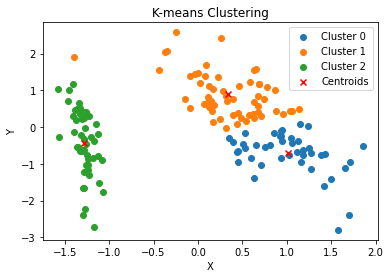

In [20]:
def print_clusters(clusters, centroids):
    """
    Plot the data points according to their clusters.
    The data points within the same clusters should have the same color. 
    Otherwise they should have different colors.
    Don't forget to mark the cluster centroids
    
    :params: clusters
    :params: centroids
    """
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink', 'gray']
    plt.figure(figsize=(10, 8))

    for idx, (key, points) in enumerate(clusters.items()):
        cluster_points = np.array(points)
        if cluster_points.size == 0: # Error avoiding.
            continue  
        if cluster_points.ndim == 1:
            cluster_points = cluster_points.reshape(1, -1) # I got errors so I had to find a solution via fixing the dimensions.
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[idx % len(colors)], label=f'Cluster {key}')

    centroids = np.array(centroids)
    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='X', s=100, label='Centroids')

    plt.legend()
    plt.title('Clusters and Centroids')
    plt.show()

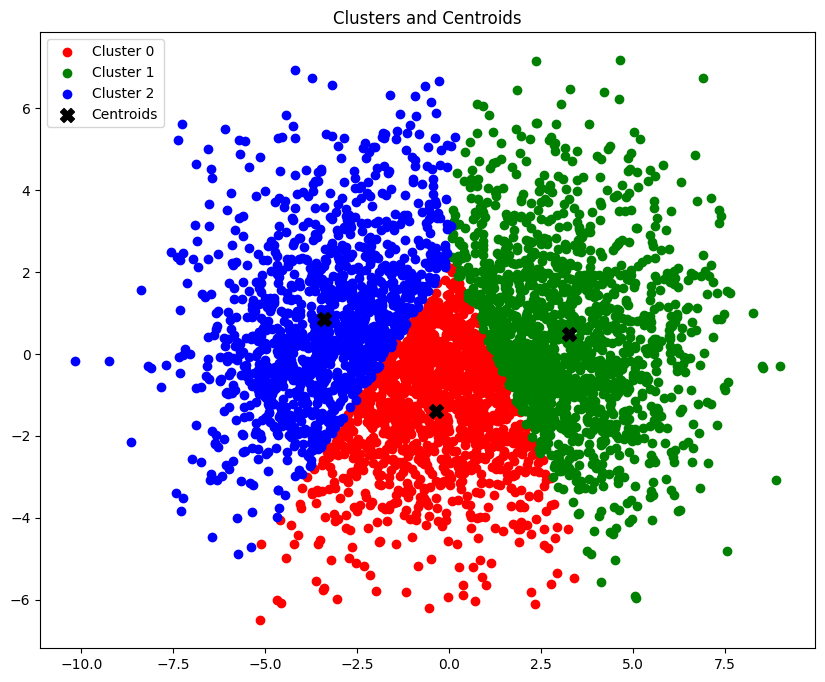

In [21]:
print_clusters(clusters_3, centroids_3)

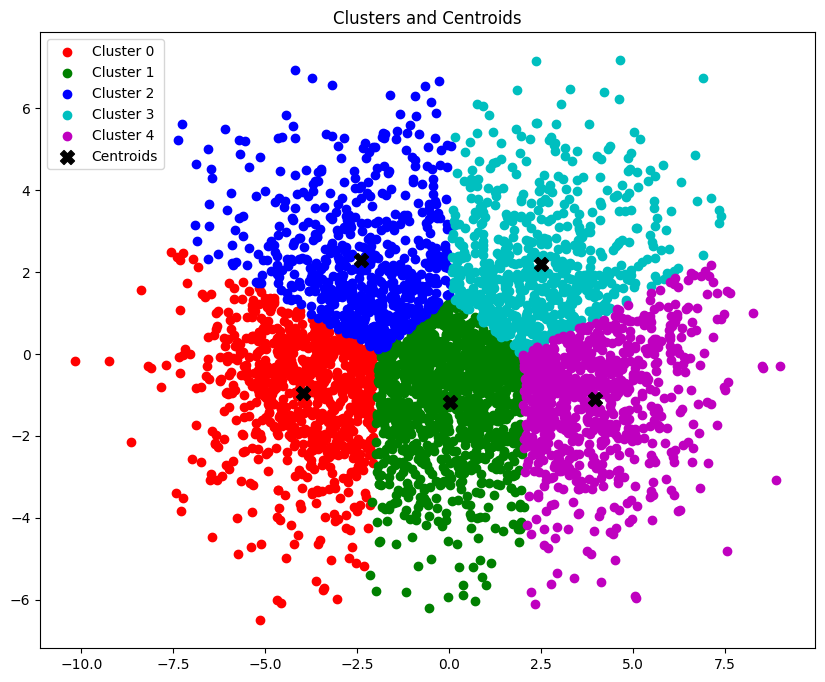

In [22]:
print_clusters(clusters_5, centroids_5)

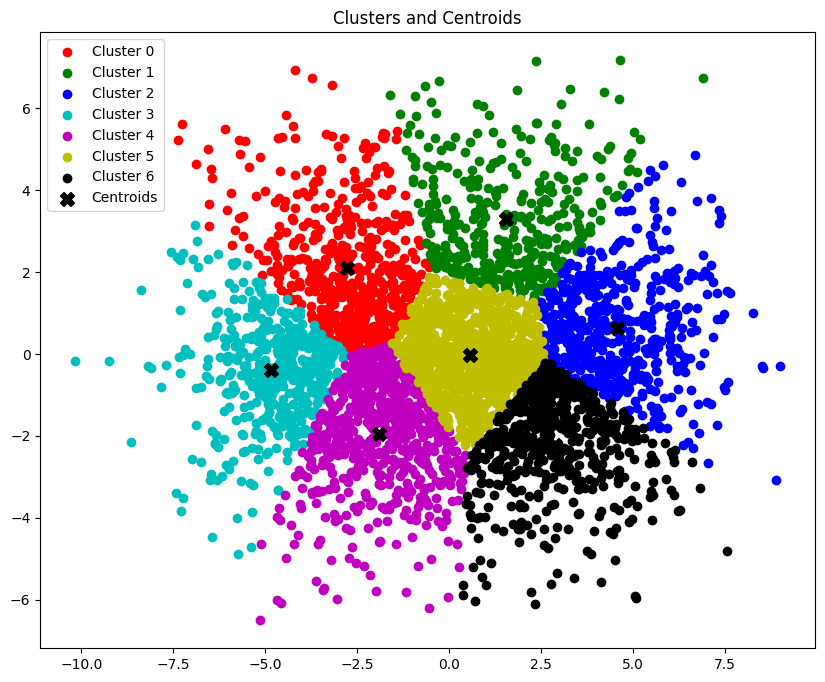

In [23]:
print_clusters(clusters_7, centroids_7)

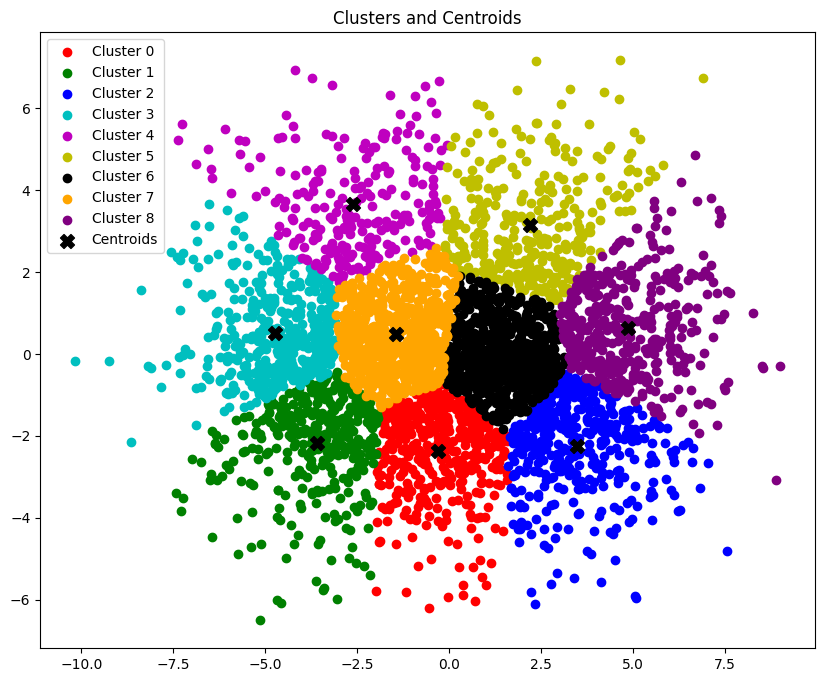

In [24]:
print_clusters(clusters_9, centroids_9)

## WCSS
* Obtain Within-Cluster Sum of Squares (WCSS) with different *k* values.
* Plot the results.
* Explain why WCSS can be used. What does the result mean to us? How can we decide the best *k* value. Interpret the plot. Write your comments.

Converged in 1 steps
Converged in 7 steps
Converged in 24 steps
Converged in 15 steps
Converged in 13 steps
Converged in 8 steps
Converged in 9 steps
Converged in 13 steps
Converged in 20 steps
Converged in 11 steps
Converged in 29 steps
Converged in 22 steps
Converged in 20 steps


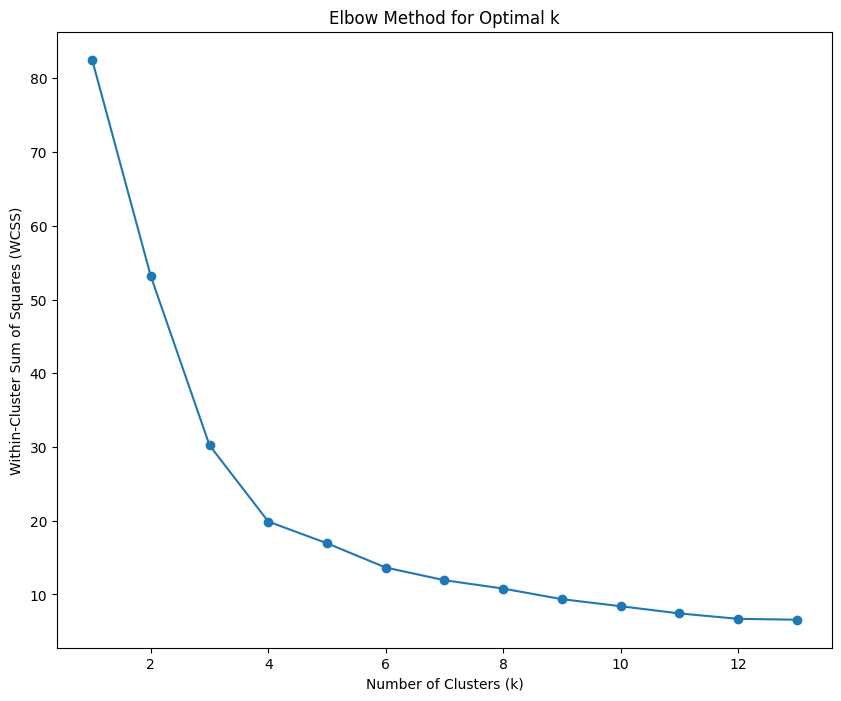

In [25]:
def plot_wcss(wcss, max_k):
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.show()

def calculate_wcss(X, max_k):
    wcss = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(X, k)
        _, _, wcss_value = kmeans.fit()
        wcss.append(wcss_value)
    return wcss

# Example usage
X = np.random.rand(500, 2)  # Replace with your data

max_k = 13
wcss = calculate_wcss(X, max_k)
plot_wcss(wcss, max_k)

Write your comments here:

In [ ]:
# This plot illustrates the elbow method for determining the optimal number of clusters (k). 
# It shows the Within-Cluster Sum of Squares (WCSS) for different values of k. 
# The goal is to find the point where adding more clusters does not significantly reduce the WCSS, suggesting the optimal k is around 4.

#OVERALL COMMENTS FOR PROJECT:

# This project successfully does the implementation of the K-Means clustering algorithm:
# Via including the core steps of centroid initialization, point assignment, centroid updating, and convergence checking etc.